<a href="https://colab.research.google.com/github/asanyal122/Notebooks/blob/main/PotentialPhivsZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.constants import epsilon_0

In [ ]:
Q,a,v,z,eps,Pi=smp.symbols('Q a v z epsilon0 pi')
expr=smp.sympify(((Q/(4*Pi*eps))*((1/smp.sqrt(4*a*a+z*z))-(1/smp.sqrt(a*a+4*z*z))))+(v*a)/z,evaluate=False,rational=True)
expr

Q*(1/sqrt(4*a**2 + z**2) - 1/sqrt(a**2 + 4*z**2))/(4*epsilon0*pi) + a*v/z

In [ ]:
Q_val=10
Pi_val=math.pi
a_val=10
v_val=10
Pi_val

3.141592653589793

In [ ]:
z_vals=np.arange(-100,100)
phi_z=[expr.subs([(Q,Q_val),(a,a_val),(v,v_val),(z,z_val),(Pi,Pi_val),(eps,epsilon_0)]).evalf() for z_val in z_vals]

In [ ]:
phi_z

[432485041.025476,
 436517665.886295,
 440622577.115041,
 444801612.967208,
 449056668.611891,
 453389697.960930,
 457802715.534497,
 462297798.359557,
 466877087.896831,
 471542791.990836,
 476297186.836465,
 481142618.954223,
 486081507.164667,
 491116344.550851,
 496249700.395472,
 501484222.077048,
 506822636.906682,
 512267753.883802,
 517822465.345563,
 523489748.480350,
 529272666.670920,
 535174370.627019,
 541198099.260776,
 547347180.250564,
 553625030.230237,
 560035154.530528,
 566581146.387571,
 573266685.519933,
 580095535.959701,
 587071543.004849,
 594198629.138822,
 601480788.738520,
 608922081.363118,
 616526623.382655,
 624298577.666314,
 632242141.004823,
 640361528.888277,
 648660957.198643,
 657144620.303564,
 665816664.953065,
 674681159.281044,
 683742056.096364,
 693003149.510812,
 702468023.789217,
 712139993.116279,
 722022030.749462,
 732116685.761341,
 742425985.259991,
 752951319.603119,
 763693307.679086,
 774651638.802141,
 785824887.143370,
 797210293.8

In [ ]:
#replace complex zoo with numpy infinity
for i in range(len(phi_z)):
  if phi_z[i]==smp.zoo:
    phi_z[i]=np.inf

In [ ]:
mx=np.NINF
mn=np.inf
#minmax scale
for i in range(len(phi_z)):
  if phi_z[i]==np.inf:
    pass
  else:
    mx=max(mx,phi_z[i])
    mn=min(mn,phi_z[i])




In [ ]:
phi_z=np.array(phi_z)
for i in range(len(phi_z)):
  if phi_z[i]==np.inf:
    pass
  else:
    phi_z[i]=(phi_z[i]-mn)/(mx-mn)
z_vals=(z_vals-np.min(z_vals))/(np.max(z_vals)-np.min(z_vals))

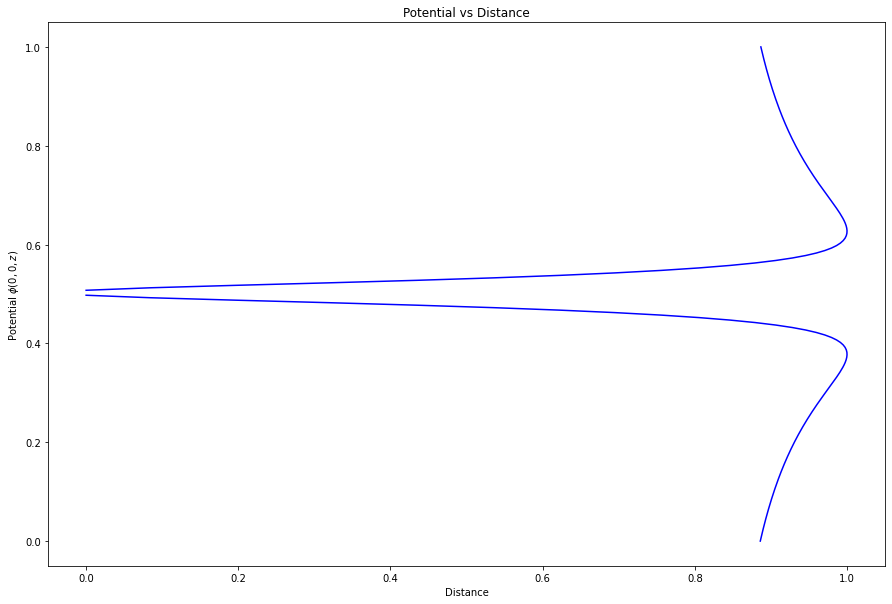

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Potential vs Distance')
plt.xlabel(r'Distance')
plt.ylabel(r'Potential $\phi(0,0,z)$')
plt.plot(phi_z,z_vals,'b-')
plt.savefig('phivsz.pdf')